# Mini Projeto 9: Variáveis Antitéticas

In [1]:
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
import scipy.stats as stats

## Resultado da integral exata

In [2]:
func = lambda x: (np.exp(x) - 1)/(np.exp(1) - 1)

In [3]:
EXACT_INT = 0.41802

## Monte Carlo Tosco

In [12]:
def get_crude_montecarlo(N, func=func):
    randoms = [rnd.random() for i in range(N)]
    results = func(randoms)
    exp_res = sum(results)/N
    var_res = sum((results - exp_res)**2)/N
    ret = [exp_res, np.sqrt(var_res)]
    return ret

## Monte Carlo: Variáveis Antitéticas

In [13]:
def get_antitetic_montecarlo(N, func=func):
    randoms = [rnd.random() for i in range(N)]
    ant_randoms = [1-j for j in randoms]
    r = randoms + ant_randoms

    results = func(r)
    exp_res = sum(results)/(2*N)
    var_res = sum((results - exp_res)**2)/(2*N)
    ret = [exp_res, np.sqrt(var_res)]
    return ret

## Resultados

### Tosco: Utilizando n = 10, 2n = 20

In [14]:
mc_0 = get_crude_montecarlo(10)

print("Monte Carlo Tosco: \n", "{}({})".format(mc_0[0], mc_0[1]))

Monte Carlo Tosco: 
 0.4343222001930598(0.3129108641948775)


Onde o primeiro termo representa o valor estimado $\hat\theta$ e entre parênteses, metade do intervalo de confiança $\sigma$

### Variáveis antitéticas: Utilizando n = 10, 2n = 20

In [15]:
mc_1 = get_antitetic_montecarlo(10)

print("Monte Carlo Tosco: \n", "{}({})".format(mc_1[0], mc_1[1]))

Monte Carlo Tosco: 
 0.4223561861264205(0.30088027417789326)


### Comparando convergência

In [25]:
N=1000
crude_values_f = []
crude_values_var_f = []

anti_values_f = []
anti_values_var_f = []

for i in range(2,N):
    crude = get_crude_montecarlo(i)
    crude_values_f.append(crude[0])
    crude_values_var_f.append(crude[1])

    anti = get_antitetic_montecarlo(i)
    anti_values_f.append(anti[0])
    anti_values_var_f.append(anti[1])

X = [i for i in range(2,N)]

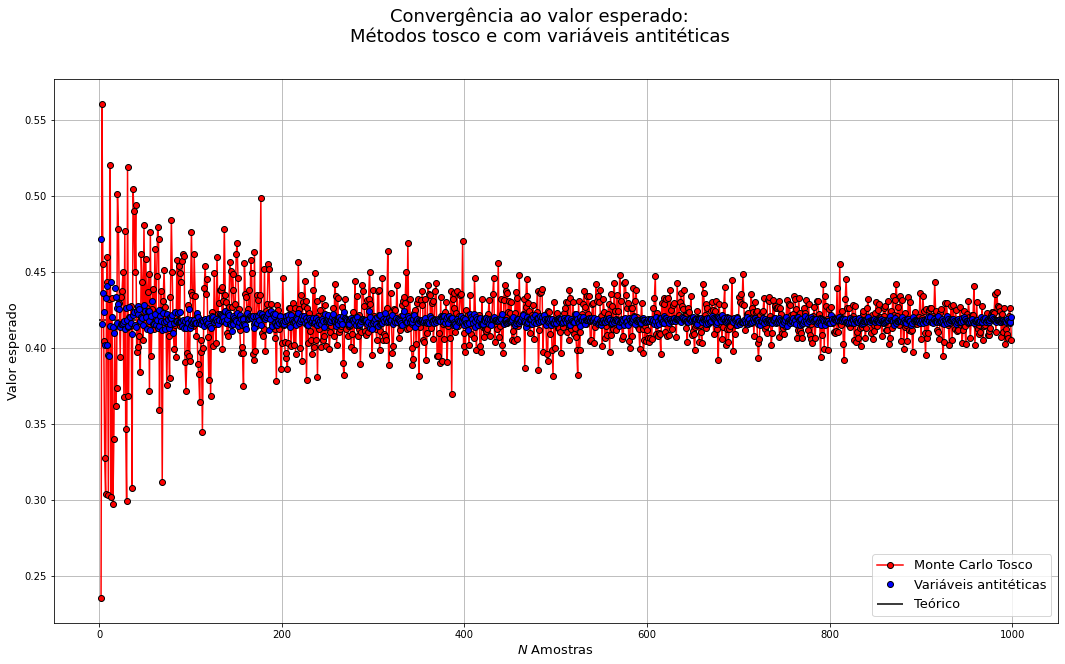

In [29]:
plt.figure(figsize=(18,10))
plt.suptitle("Convergência ao valor esperado:\nMétodos tosco e com variáveis antitéticas", fontsize=18)

plt.plot(X, crude_values_f, 'o-', color='red', markeredgecolor='k', label='Monte Carlo Tosco')
plt.hlines(EXACT_INT, 0, N, label='Teórico')

plt.plot(X, anti_values_f, 'o', color='blue', markeredgecolor='k', label=r"Variáveis antitéticas")

plt.ylabel('Valor esperado', fontsize=13)
plt.xlabel(r"$N$ Amostras", fontsize=13)

#plt.ylim(0.1,)
plt.grid()
plt.legend(loc='lower right', fontsize=13)
plt.show()